# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

To submit your homework, take the following steps.

1. Save and commit this notebook.
2. Push your changes to GitHub.
3. Confirm that your changes are visible in GitHub.
4. Delete the codespace to avoid wasting your free quota.

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Titanic disaster](https://www.kaggle.com/c/titanic/data) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/titanic))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [6]:
wine_data = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_red/wine_quality_red.tsv.gz", sep="\t")
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
q1_randsample = wine_data.sample(10, random_state = 15)
q1_randsample

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
776,6.9,0.765,0.18,2.4,0.243,5.5,48.0,0.99612,3.40,0.60,10.3,6
740,8.3,0.760,0.29,4.2,0.075,12.0,16.0,0.99650,3.45,0.68,11.5,6
1351,7.2,0.620,0.01,2.3,0.065,8.0,46.0,0.99332,3.32,0.51,11.8,6
794,10.1,0.270,0.54,2.3,0.065,7.0,26.0,0.99531,3.17,0.53,12.5,6
290,8.7,0.520,0.09,2.5,0.091,20.0,49.0,0.99760,3.34,0.86,10.6,7
117,7.8,0.560,0.12,2.0,0.082,7.0,28.0,0.99700,3.37,0.50,9.4,6
896,8.3,0.310,0.39,2.4,0.078,17.0,43.0,0.99444,3.31,0.77,12.5,7
547,10.6,0.310,0.49,2.5,0.067,6.0,21.0,0.99870,3.26,0.86,10.7,6
700,10.6,1.020,0.43,2.9,0.076,26.0,88.0,0.99840,3.08,0.57,10.1,6
1523,6.8,0.480,0.25,2.0,0.076,29.0,61.0,0.99530,3.34,0.60,10.4,5


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [9]:
wine_data.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'target']

Same columns as in the DX601 wine dataset. Fixed acidity is the concentration of fixed acids in the wine, such as tartaric and malic acid. These contribute to the taste and structure of the wine. Volatile acidity is the concentration of volatile acids in the wine, such as acetic acid. These acids can evaporate readily and be detected by smell and often indicate freshness or spoilage of the wine. Citric acid is the concentration of citric acid in the wine, which is a type of fixed acid. These usually contribute a fresh flavor to the wine. Residual sugar is the amount of sugar remaining after the wine is fermented. Chloride is the amount of salt in the wine, and often depends on the geographic location and climate of the vineyard. Free sulfur dioxide is the sulfur dioxide not chemically bound to other molecules in the wine while total sulfur dioxide includes the bounded sulfur dioxide (typically binds to sugars or aldehydes). Sulfur dioxide protects the wine from oxidation and spoiling by inhibiting the growth of microorganisms. Density and pH are self-explanatory columns, with wine typically having a density slightly below that of water at around 0.99 g/mL, and a pH between 3 and 4 which is considered acidic. Density can slightly vary between red, white, dry, and sweet wines. The same variations between wines can be found for pH levels, where different pH levels can greatly influence the taste and quality. Sulphates are similar to sulfur dioxide in that they help prevent the wine from bacteria and act as a preservative. Alcohol is the alcohol content of the wine as a percentage, and target is the wine quality score that all these columns contribute towards.

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

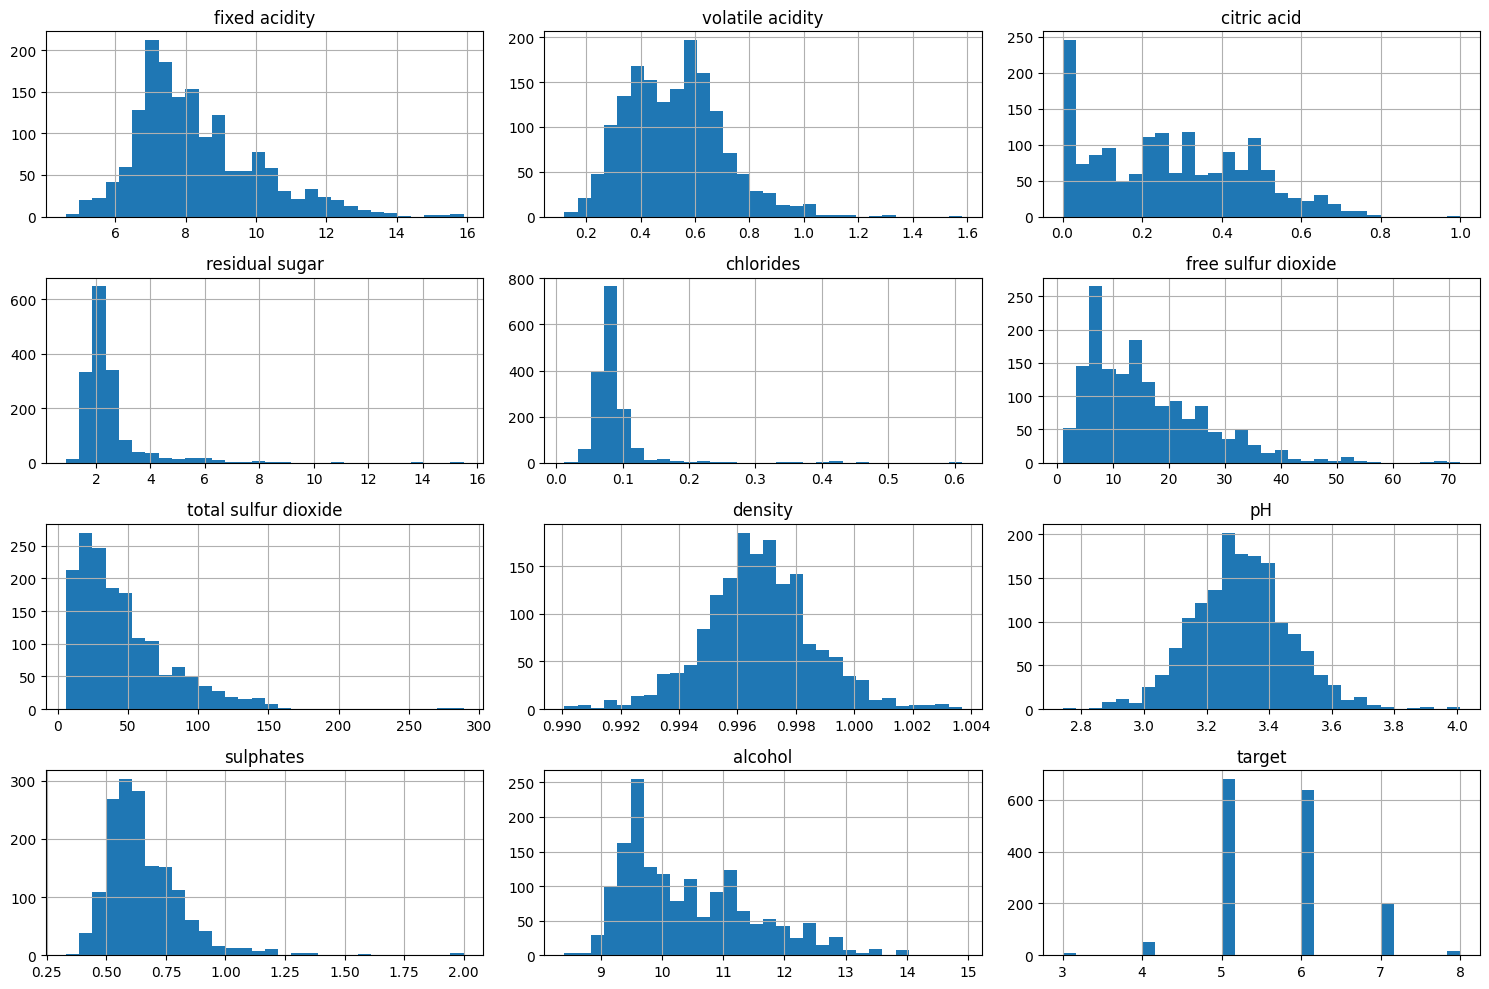

In [31]:
# Distribution of all variables
wine_data.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

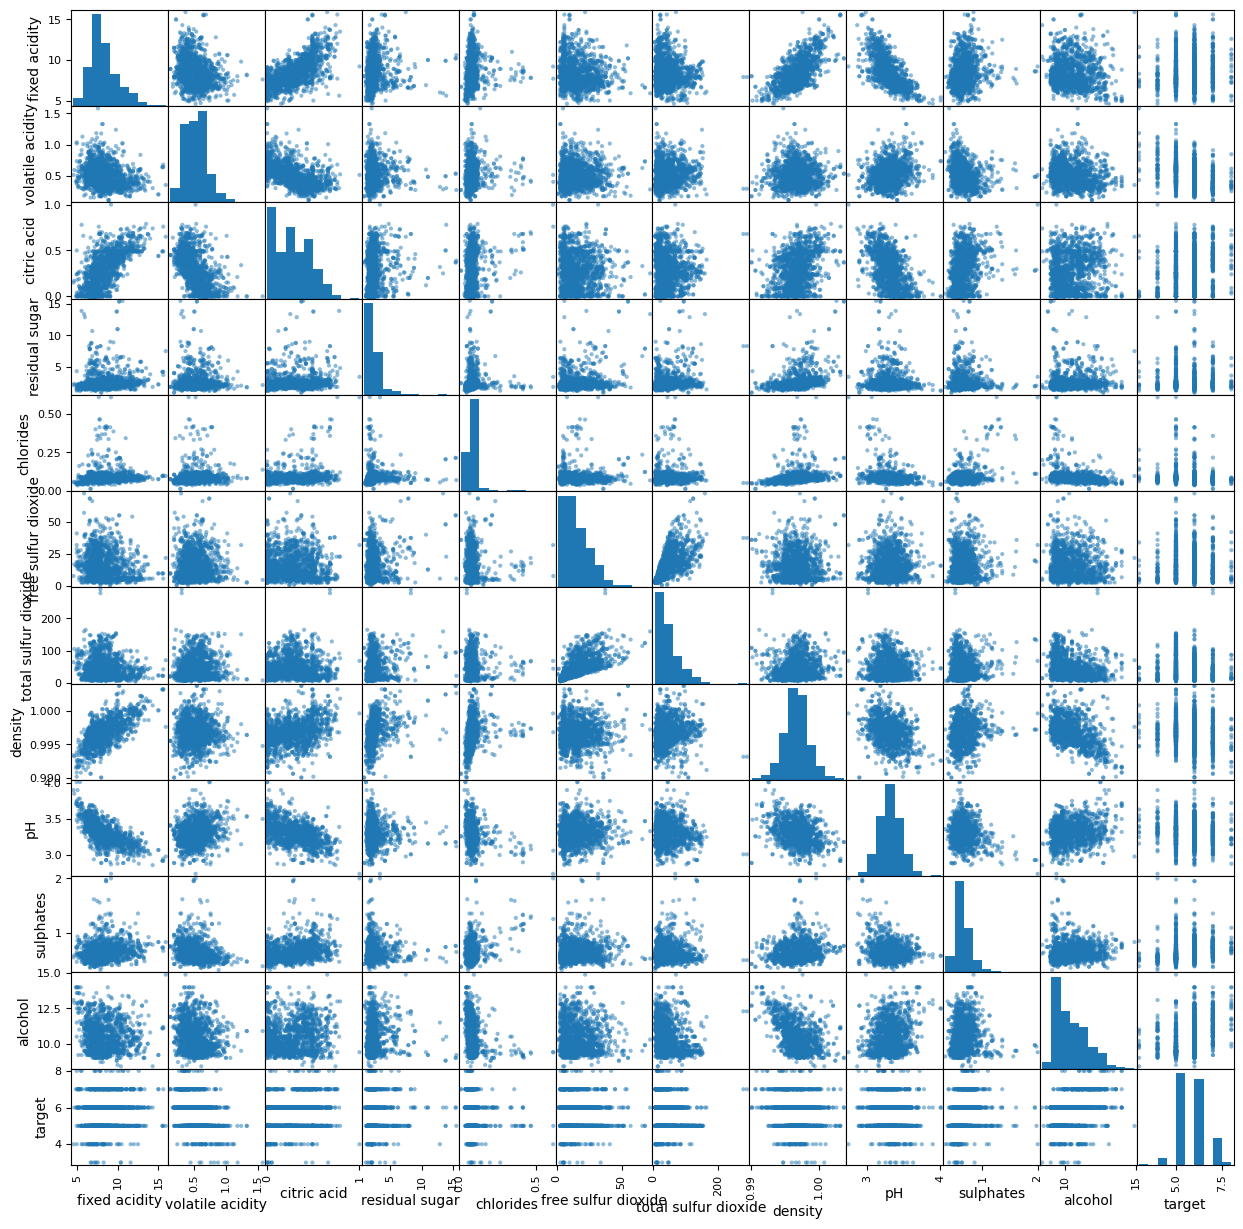

In [33]:
# scatter matrix of all variables
scatt_matrix = pd.plotting.scatter_matrix(wine_data, figsize=(15,15))

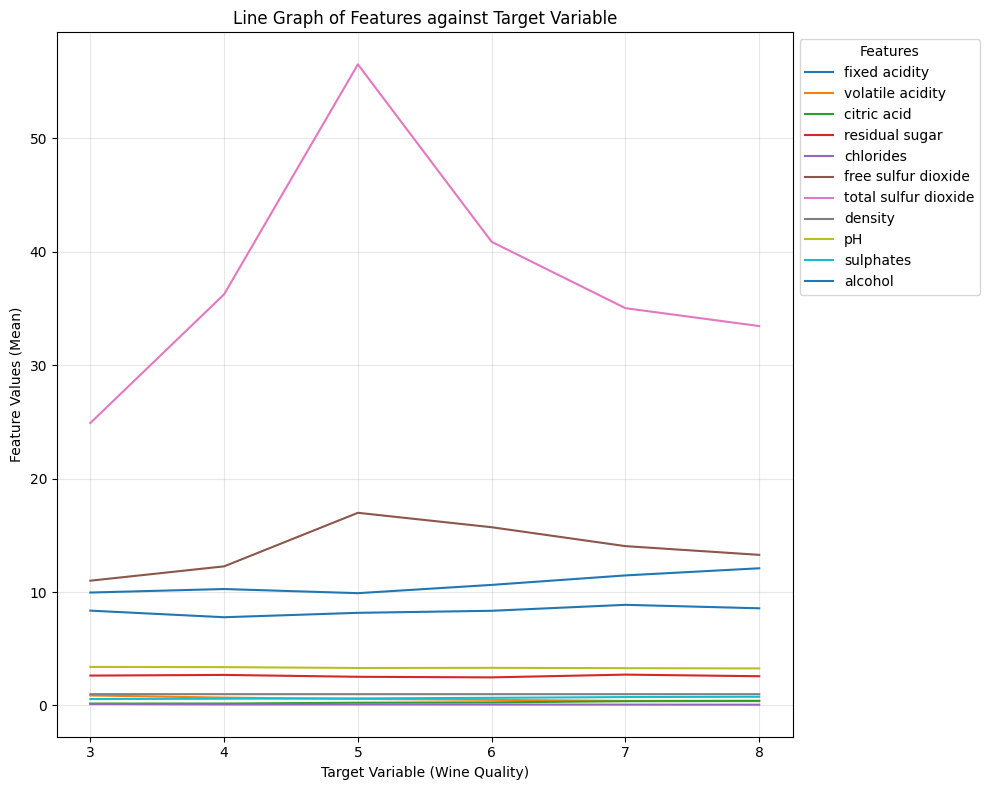

In [53]:
#Line plots with respect to the target variable (means of all features)
grouped_data = wine_data.groupby('target').mean()

plt.figure(figsize=(10, 8))
for column in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[column], label=column)

plt.title("Line Graph of Features against Target Variable")
plt.xlabel("Target Variable (Wine Quality)")
plt.ylabel("Feature Values (Mean)")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Features")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

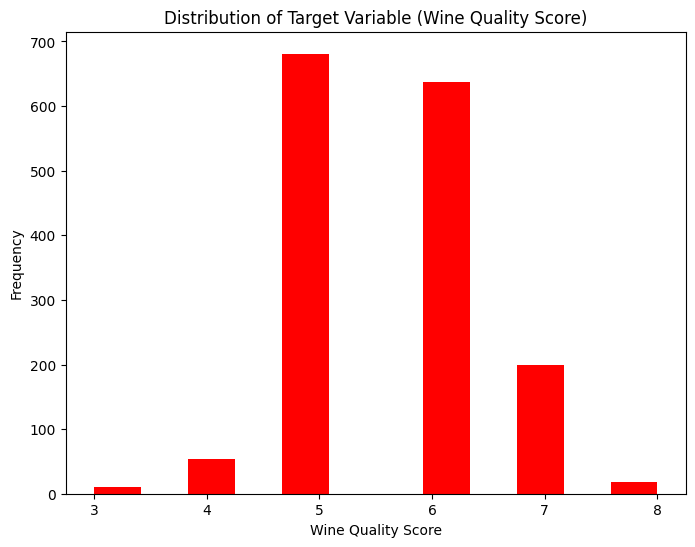

In [41]:
#Chart #1
plt.figure(figsize=(8, 6))
plt.hist(wine_data['target'], bins=12, color='red')
plt.title("Distribution of Target Variable (Wine Quality Score)")
plt.xlabel("Wine Quality Score")
plt.ylabel("Frequency")
plt.show()

I found the distribution of the target variable to be noteworthy as it follows a normal distribution. It's important to note the features and aspects of the variable that we are trying to predict, so seeing the distribution of the data so far is important. This tells us that the majority of the data received a score of 5 or 6, and that the mean, mode, and median of the target variable are all highly similar. Following this trend, future wines would likely also trend towards this 5-6 score range.

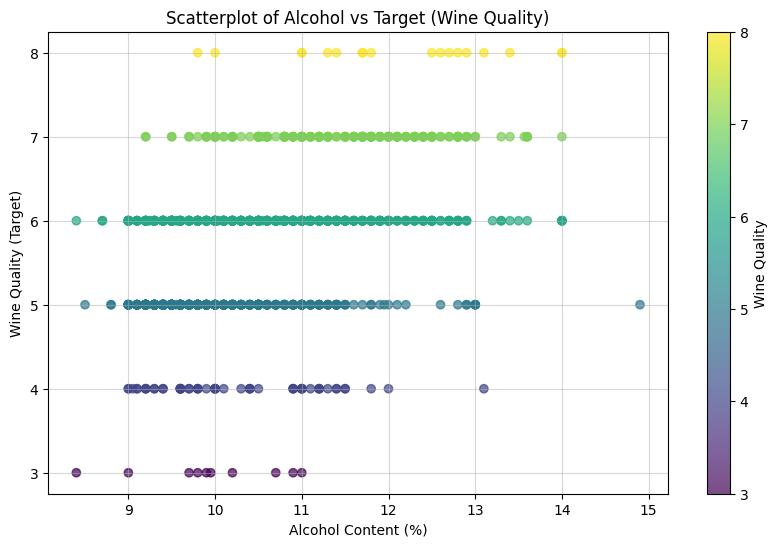

In [51]:
#Chart #2
plt.figure(figsize=(10, 6))
plt.scatter(wine_data['alcohol'], wine_data['target'], alpha=0.7, c=wine_data['target'])
plt.title("Scatterplot of Alcohol vs Target (Wine Quality)")
plt.xlabel("Alcohol Content (%)")
plt.ylabel("Wine Quality (Target)")
plt.colorbar(label='Wine Quality')
plt.grid(alpha=0.5)
plt.show()

I found this scatterplot interesting as alcohol content had the highest individual correlation with the target variable. As seen in the scatterplot, as alcohol content increases, the wine quality trends upward as well. This was a similar case as in the DX601 project, so it is interesting to confirm the same trend in this dataset. Although far from a perfect correlation, it is an interesting note to make off of initial exploration.

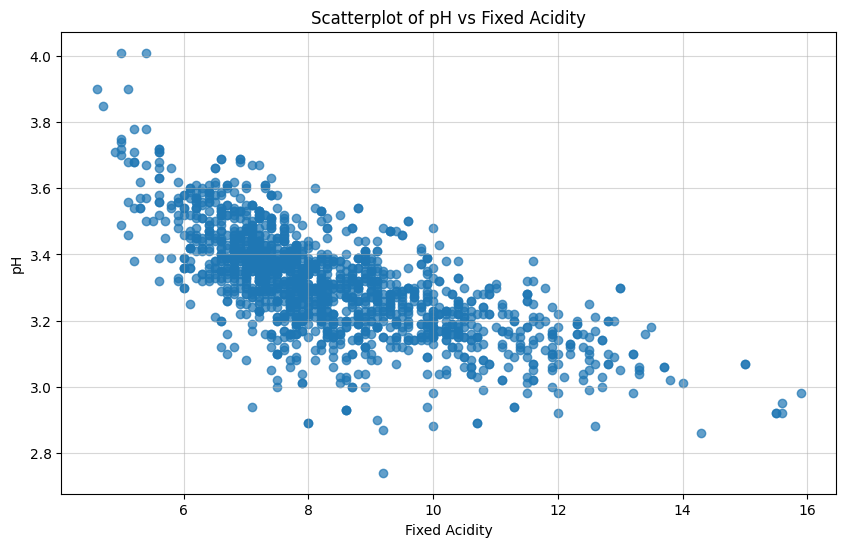

In [ ]:
#Chart #3 
plt.figure(figsize=(10, 6))
plt.scatter(wine_data['fixed acidity'], wine_data['pH'], alpha=0.7, label='pH')

plt.title("Scatterplot of pH vs Fixed Acidity")
plt.xlabel("Fixed Acidity")
plt.ylabel("pH")
plt.grid(alpha=0.5)
plt.show()

I found this scatterplot to be interesting as it seemed to be the highest (negative) correlation between features. pH and fixed acidity trend in opposite directions, likely due to scientific and chemical properties. Though not a perfect negative correlation, there is a visible trend, which stuck out when visualized in the scatterplot matrix.

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

In [16]:
corr_matrix = wine_data.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


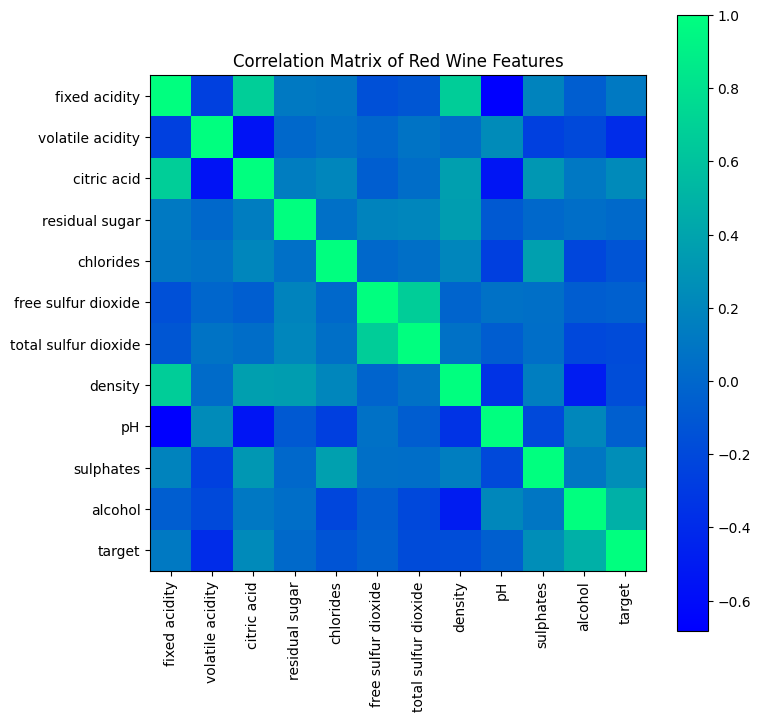

In [75]:
plt.figure(figsize=(8, 8))
plt.imshow(corr_matrix, cmap='winter', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Matrix of Red Wine Features")
plt.show()

The pair of features with the highest positive correlation is citric acid and fixed acidity with a correlation coefficient of 0.672. The pair of features with the highest negative correlation is pH and fixed acidity with a correlation coefficient of -0.683.

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

#1 Linear Regression Model\
-Scikit-learn : https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html \
-Wikipedia : https://en.wikipedia.org/wiki/Linear_regression \
#2 Random Forest Regressor Model \ 
-Scikit-learn : https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestRegressor.html \
-Wikipedia : https://en.wikipedia.org/wiki/Random_forest \
#3 Ridge Regression Model \
-Scikit-learn : https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.ridge_regression.html \
-Wikipedia : https://en.wikipedia.org/wiki/Ridge_regression

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

In [59]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [62]:
x_data = wine_data.drop(columns=['target'])
y_data = wine_data['target']

#Initializing models
linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=100)

#Fitting models
linear_reg.fit(x_data, y_data)
ridge_reg.fit(x_data, y_data)
rf_reg.fit(x_data, y_data)

#Predicted values
y_pred_linear = linear_reg.predict(x_data)
y_pred_ridge = ridge_reg.predict(x_data)
y_pred_rf = rf_reg.predict(x_data)

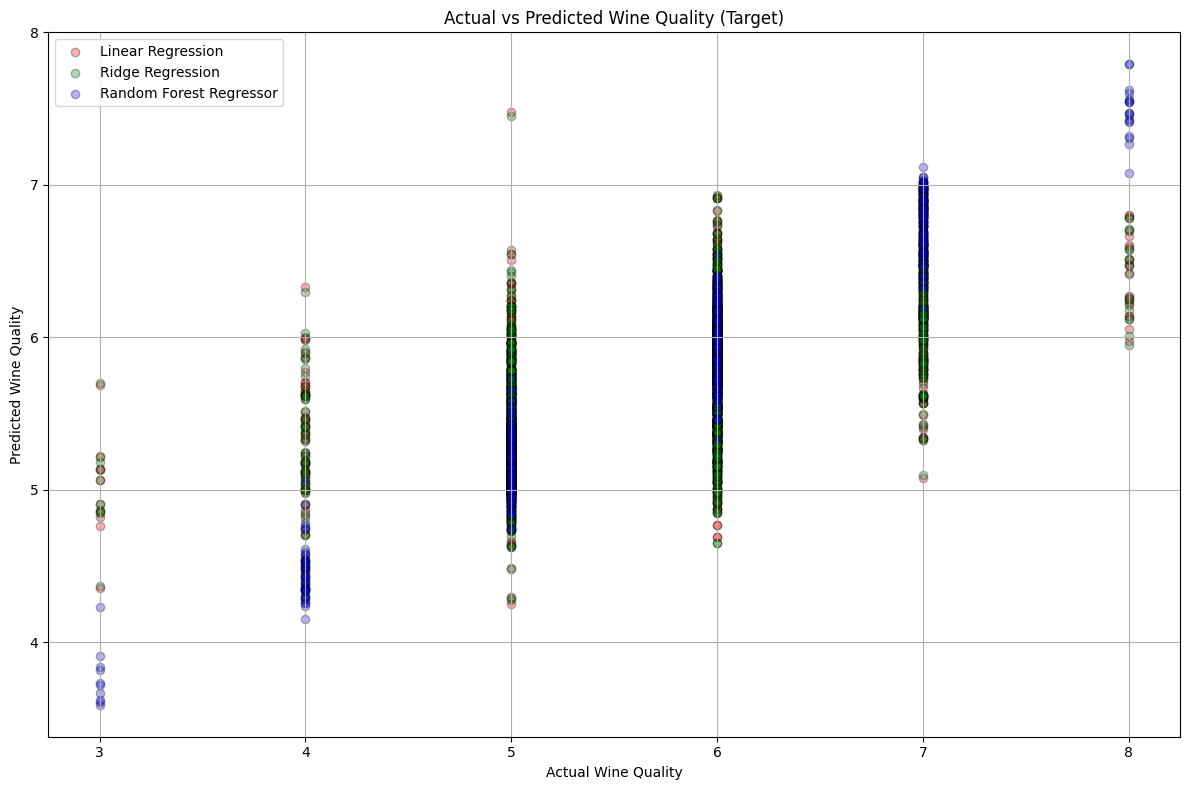

In [71]:
plt.figure(figsize=(12, 8))
plt.scatter(y_data, y_pred_linear, alpha=0.3, label="Linear Regression", color='red', edgecolors='black')
plt.scatter(y_data, y_pred_ridge, alpha=0.3, label="Ridge Regression", color='green', edgecolors='black')
plt.scatter(y_data, y_pred_rf, alpha=0.3, label="Random Forest Regressor", color='blue', edgecolors='black')

plt.title('Actual vs Predicted Wine Quality (Target)')
plt.xlabel('Actual Wine Quality')
plt.ylabel('Predicted Wine Quality')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()

In [69]:
l2_loss_linear = mean_squared_error(y_data, y_pred_linear)
l1_loss_linear = mean_absolute_error(y_data, y_pred_linear)

l2_loss_ridge = mean_squared_error(y_data, y_pred_ridge)
l1_loss_ridge = mean_absolute_error(y_data, y_pred_ridge)

l2_loss_rf = mean_squared_error(y_data, y_pred_rf)
l1_loss_rf = mean_absolute_error(y_data, y_pred_rf)

losses = {
    'Linear Regression': {'L2 Loss (MSE)': l2_loss_linear, 'L1 Loss (MAE)': l1_loss_linear},
    'Ridge Regression': {'L2 Loss (MSE)': l2_loss_ridge, 'L1 Loss (MAE)': l1_loss_ridge},
    'Random Forest Regressor': {'L2 Loss (MSE)': l2_loss_rf, 'L1 Loss (MAE)': l1_loss_rf}
}

losses_df = pd.DataFrame(losses).T
print(losses_df)

                         L2 Loss (MSE)  L1 Loss (MAE)
Linear Regression             0.416767       0.500490
Ridge Regression              0.417466       0.501232
Random Forest Regressor       0.045595       0.148249


From the loss functions, it is clear that out of these 3 regression models, the random forest regressor performed the best in predicting the wine quality target scores. Even in the scatterplot, although the points are stacked, it is still distinguishable that the random forest regressor model (blue) performed the best when comparing predicted vs actual values.

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [76]:
from sklearn.model_selection import cross_validate

In [81]:
# Scoring parameter set to the negative mean squared error as cross_validate will minimize the scores by default

cv_linear_reg = cross_validate(linear_reg, x_data, y_data, cv=5, scoring='neg_mean_squared_error')
cv_ridge_reg = cross_validate(ridge_reg, x_data, y_data, cv=5, scoring='neg_mean_squared_error')
cv_rf_reg = cross_validate(rf_reg, x_data, y_data, cv=5, scoring='neg_mean_squared_error')

# Set the negative MSEs to positive

cv_linear_reg_mse = -cv_linear_reg['test_score'].mean()
cv_ridge_reg_mse = -cv_ridge_reg['test_score'].mean()
cv_rf_reg_mse = -cv_rf_reg['test_score'].mean()

In [84]:
results = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Random Forest Regressor'],
    'L2 Loss (Cross-Validation)': [cv_linear_reg_mse, cv_ridge_reg_mse, cv_rf_reg_mse],
    'L2 Loss (Original, training on the whole data set)': [l2_loss_linear, l2_loss_ridge, l2_loss_rf]
}

results_df = pd.DataFrame(results)
print(results_df)

                     Model  L2 Loss (Cross-Validation)  \
0        Linear Regression                    0.436629   
1         Ridge Regression                    0.436505   
2  Random Forest Regressor                    0.423823   

   L2 Loss (Original, training on the whole data set)  
0                                           0.416767   
1                                           0.417466   
2                                           0.044630   


The difference is slight in the L2 loss functions between the linear and ridge regression models when comparing cross-validated predicted values and the original values trained on the whole dataset. There is a large difference in the random forest regressor results, where the cross-validated L2 loss is much higher and comparable to the other two models. This difference is likely due to overfitting

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [85]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_data)

linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=100)

linear_reg.fit(x_scaled, y_data)
ridge_reg.fit(x_scaled, y_data)
rf_reg.fit(x_scaled, y_data)

y_pred_lr = linear_reg.predict(x_scaled)
y_pred_ridge = ridge_reg.predict(x_scaled)
y_pred_rf = rf_reg.predict(x_scaled)

In [93]:
l2_loss_linear_std = mean_squared_error(y_data, y_pred_lr)
l2_loss_ridge_std = mean_squared_error(y_data, y_pred_ridge)
l2_loss_rf_std = mean_squared_error(y_data, y_pred_rf)

losses = {
    'Linear Regression': {'L2 Loss (MSE, Standardized)': l2_loss_linear_std},
    'Ridge Regression': {'L2 Loss (MSE, Standardized)': l2_loss_ridge_std},
    'Random Forest Regressor': {'L2 Loss (MSE, Standardized)': l2_loss_rf_std}
}

losses_df = pd.DataFrame(losses).T
print(losses_df)

                         L2 Loss (MSE, Standardized)
Linear Regression                           0.416767
Ridge Regression                            0.416767
Random Forest Regressor                     0.044510


The L2 losses are nearly identifical for the linear regression and random forest regressor models. The only difference is that the ridge regression now yields the same L2 loss as the linear regression model after standardization was performed.

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

While this can potentially improve model performance, repeatedly building decision trees with random depths can result in overfitting and inefficiency as it would be randomly searching for marginal improvements without clear fine tuning of parameters.

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

The random forest regressor model was the best model out of the ones explored in this assignment. Based on the L2 and L1 loss functions, visualizations, and even after cross-validation/preprocessing, the random forest regressor model had the best performance in terms of predicting the correct wine quality score based on the input features. On the L2 loss function alone, the random forest model outperformed by a factor of nearly 10x, and it was clear in the stacked scatter plot that this model was the closest in terms of correct predictions. The L2 loss is the mean squared error, measuring the error between a predicted value and the actual values. More specifically, it calculates the average of the squared differences between values. As a common model evaluation metric, random forest regression performed the best. In context of the original data set, the best model to predict a wine quality score from the given input features is to use a random forest, or a combination of multiple levels of decision trees used to make predictions by averaging the predictions from each of the trees.